In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import random
import math

In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [23]:
print(data)

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
	# <---INSERT YOUR CODE HERE--->
	new_sample = []
	for s in sample:
		if not np.isnan(s):
			new_sample.append(s)
	sample = new_sample

	samples = []
	for i in range(n_iterations):
		current = []
		for j in range(sample_size):
			current.append(random.choice(sample))
		samples.append(current)
	
	mean_all = 0
	for i in range(n_iterations):
		for j in range(sample_size):
			mean_all = mean_all + samples[i][j]
		mean_all = mean_all / (sample_size * n_iterations)

	mean_each = []
	for i in range(n_iterations):
		current = 0
		for j in range(sample_size):
			current = current + samples[i][j]
		mean_each.append(current / n_iterations)
	 
	lower = np.percentile(mean_each, 2.5)
	upper = np.percentile(mean_each, 97.5)
	data_mean = mean_all
	return data_mean, lower, upper


(0, 100000)

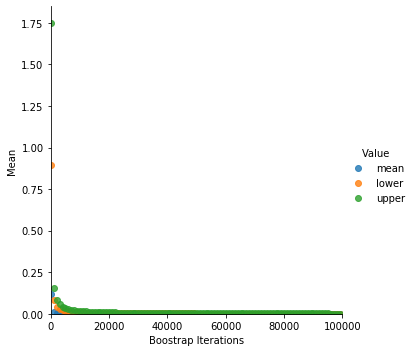

In [25]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, n_iterations, ci):
	# <---INSERT YOUR CODE HERE--->
	new_samples = []
	for s in sample:
		if not np.isnan(s):
			new_samples.append(s)
	sample = new_samples

	samples = []
	for i in range(n_iterations):
		current = []
		for j in range(sample_size):
			current.append(random.choice(sample))
		samples.append(current)
	
	mean_all = 0
	for i in range(n_iterations):
		for j in range(sample_size):
			mean_all = mean_all + samples[i][j]
		mean_all = mean_all / (sample_size * n_iterations)

	mean_each = []
	for i in range(n_iterations):
		current = 0
		for j in range(sample_size):
			current = current + samples[i][j]
		mean_each.append(current / n_iterations)
	 
	lower = np.percentile(mean_each, ci/2)
	upper = np.percentile(mean_each, 100-(ci/2))
	data_mean = mean_all
	return data_mean, lower, upper

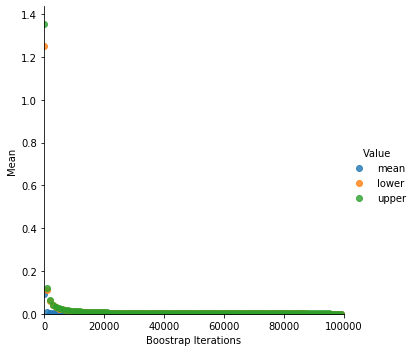

In [27]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


In [28]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd 
df=pd.read_csv('/content/gdrive/My Drive/Essex/Data Science/essex_data_science/lab2 - bootstrap/vehicles.csv')

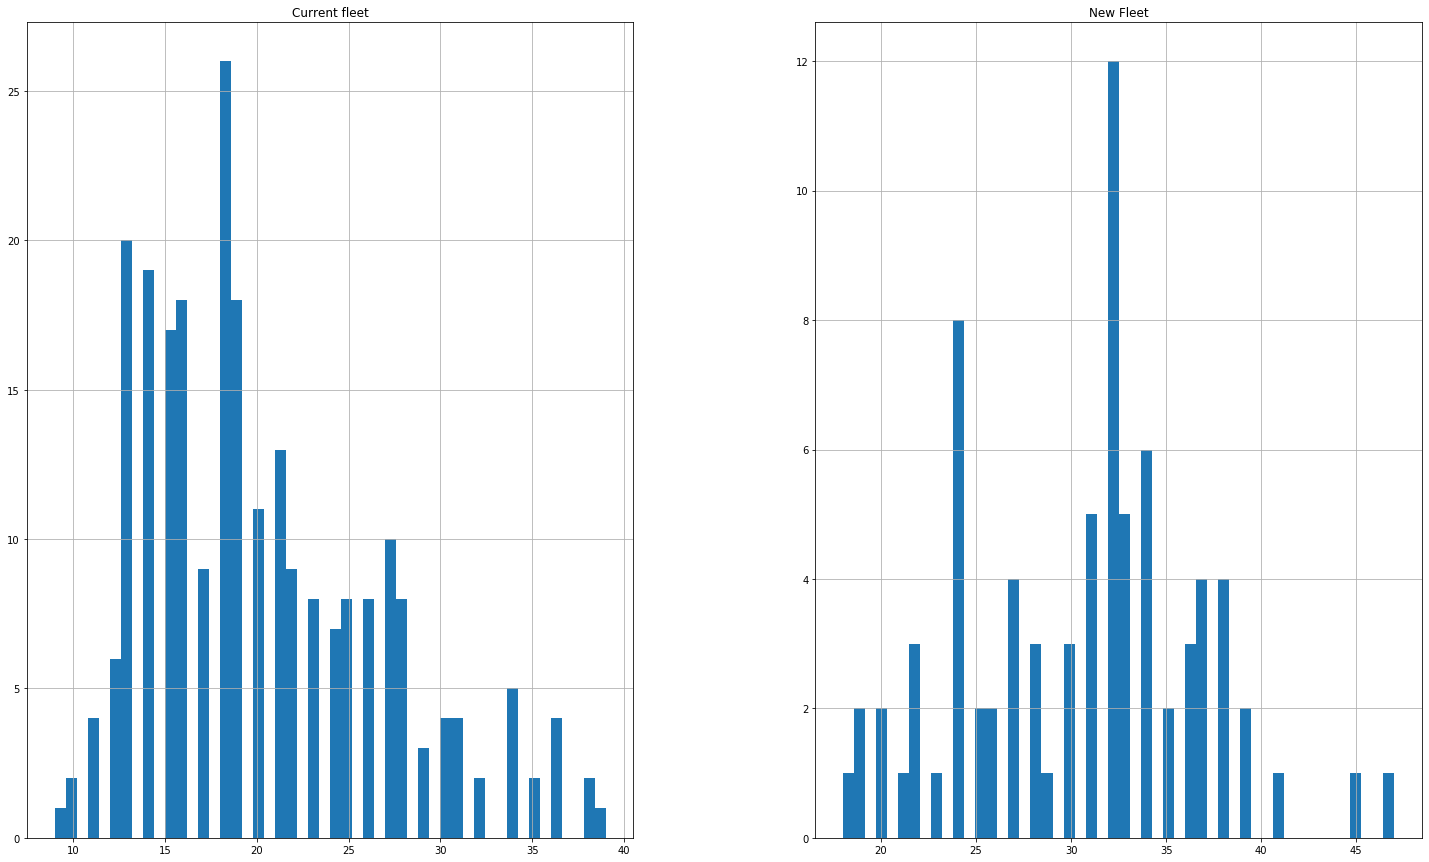

In [30]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(25,15))
plt.show()

In [31]:
df.head()

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0


In [0]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!

In [33]:
df.iloc[:,0]

0      18
1      15
2      18
3      16
4      17
       ..
244    27
245    27
246    32
247    28
248    31
Name: Current fleet, Length: 249, dtype: int64

In [34]:
boostrap_mean_ci(df.iloc[:,0], 10, 10, 5)

(1.9910781479911979, 17.1125, 22.11)

In [35]:
boostrap_mean_ci(df.iloc[:,1], 10, 10, 5)

(3.0832131487060384, 27.78, 32.9775)

In [36]:
df.iloc[:,1]

0      24.0
1      27.0
2      27.0
3      25.0
4      31.0
       ... 
244     NaN
245     NaN
246     NaN
247     NaN
248     NaN
Name: New Fleet, Length: 249, dtype: float64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
Current fleet    249 non-null int64
New Fleet        79 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.0 KB


In [38]:
df

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
244,27,NaN
245,27,NaN
246,32,NaN
247,28,NaN
